<a href="https://colab.research.google.com/github/deepavasanthkumar/deepcodesnippets/blob/master/Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install diagrams

In [ ]:
from diagrams.gcp.security import Iam

In [ ]:
from diagrams.custom import Custom

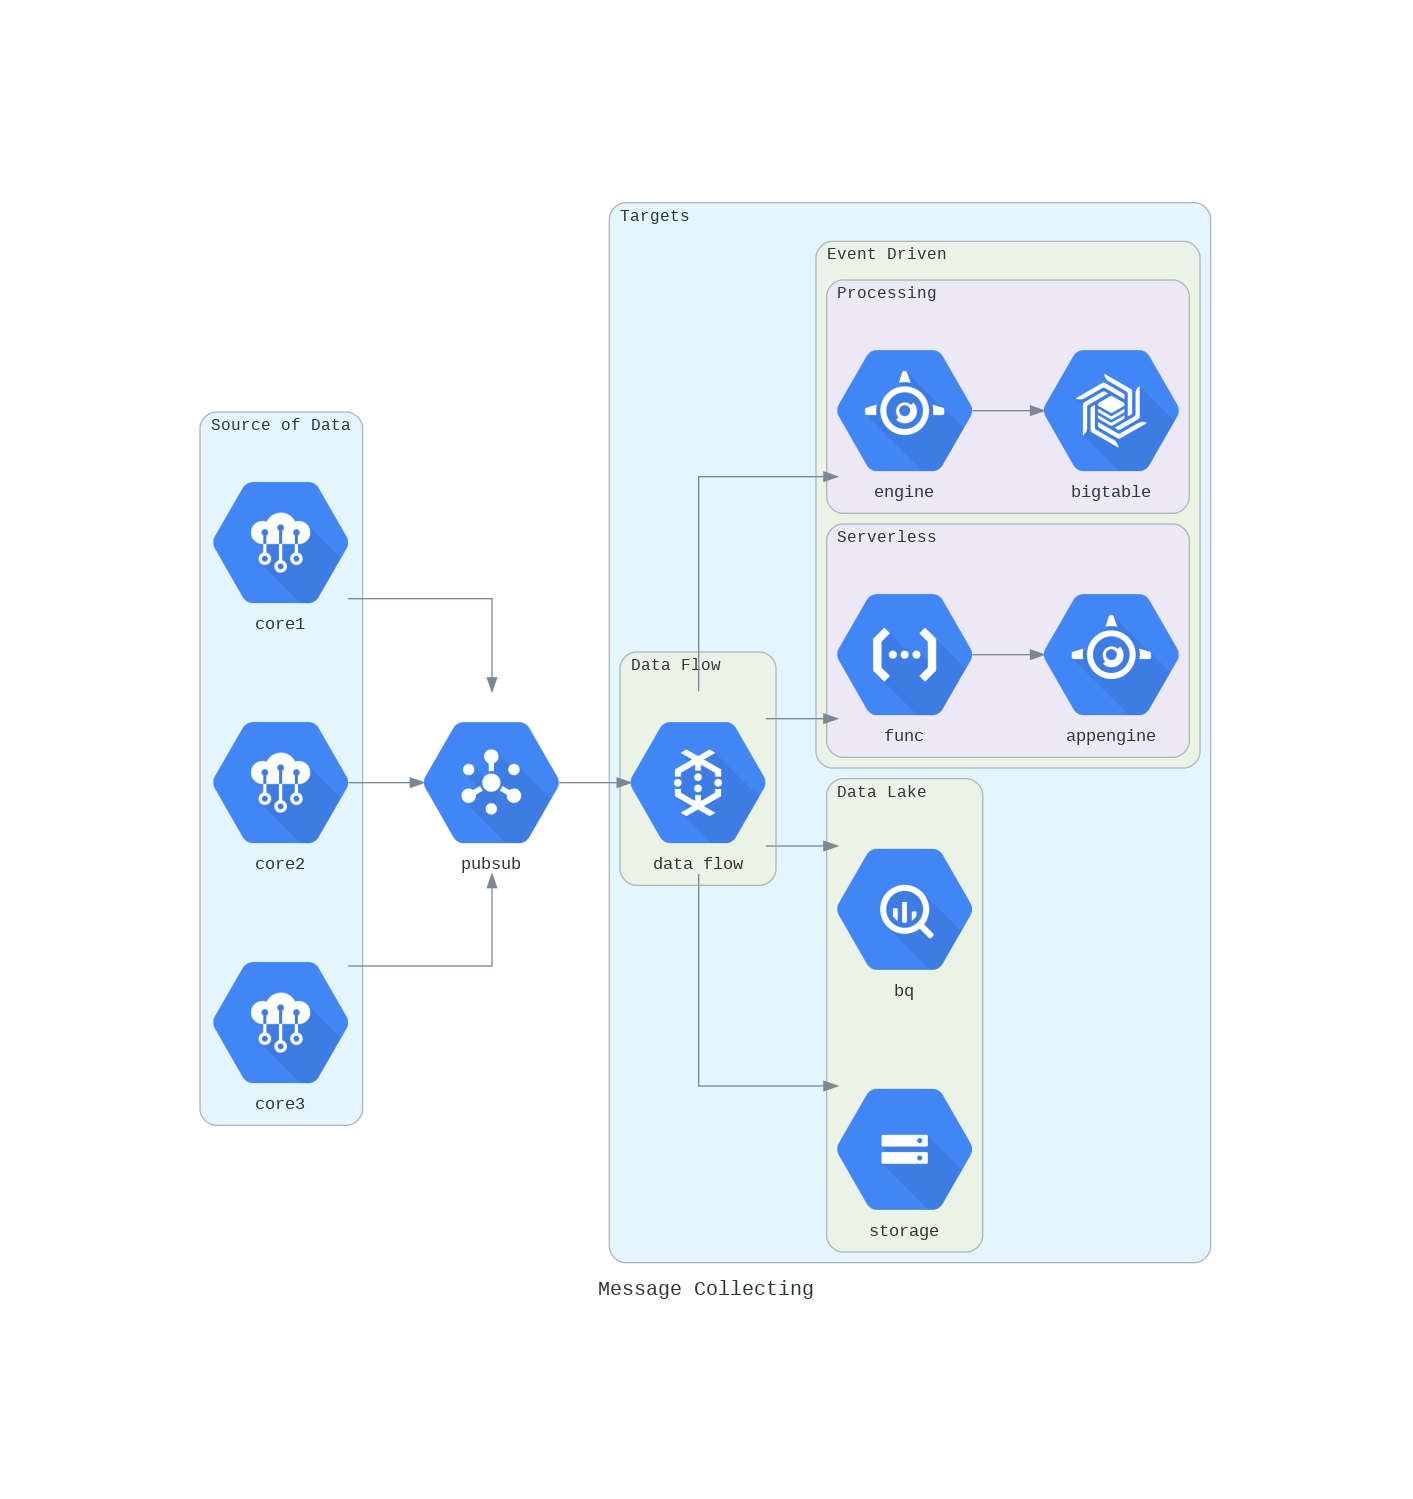

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False) as sample:
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow
sample


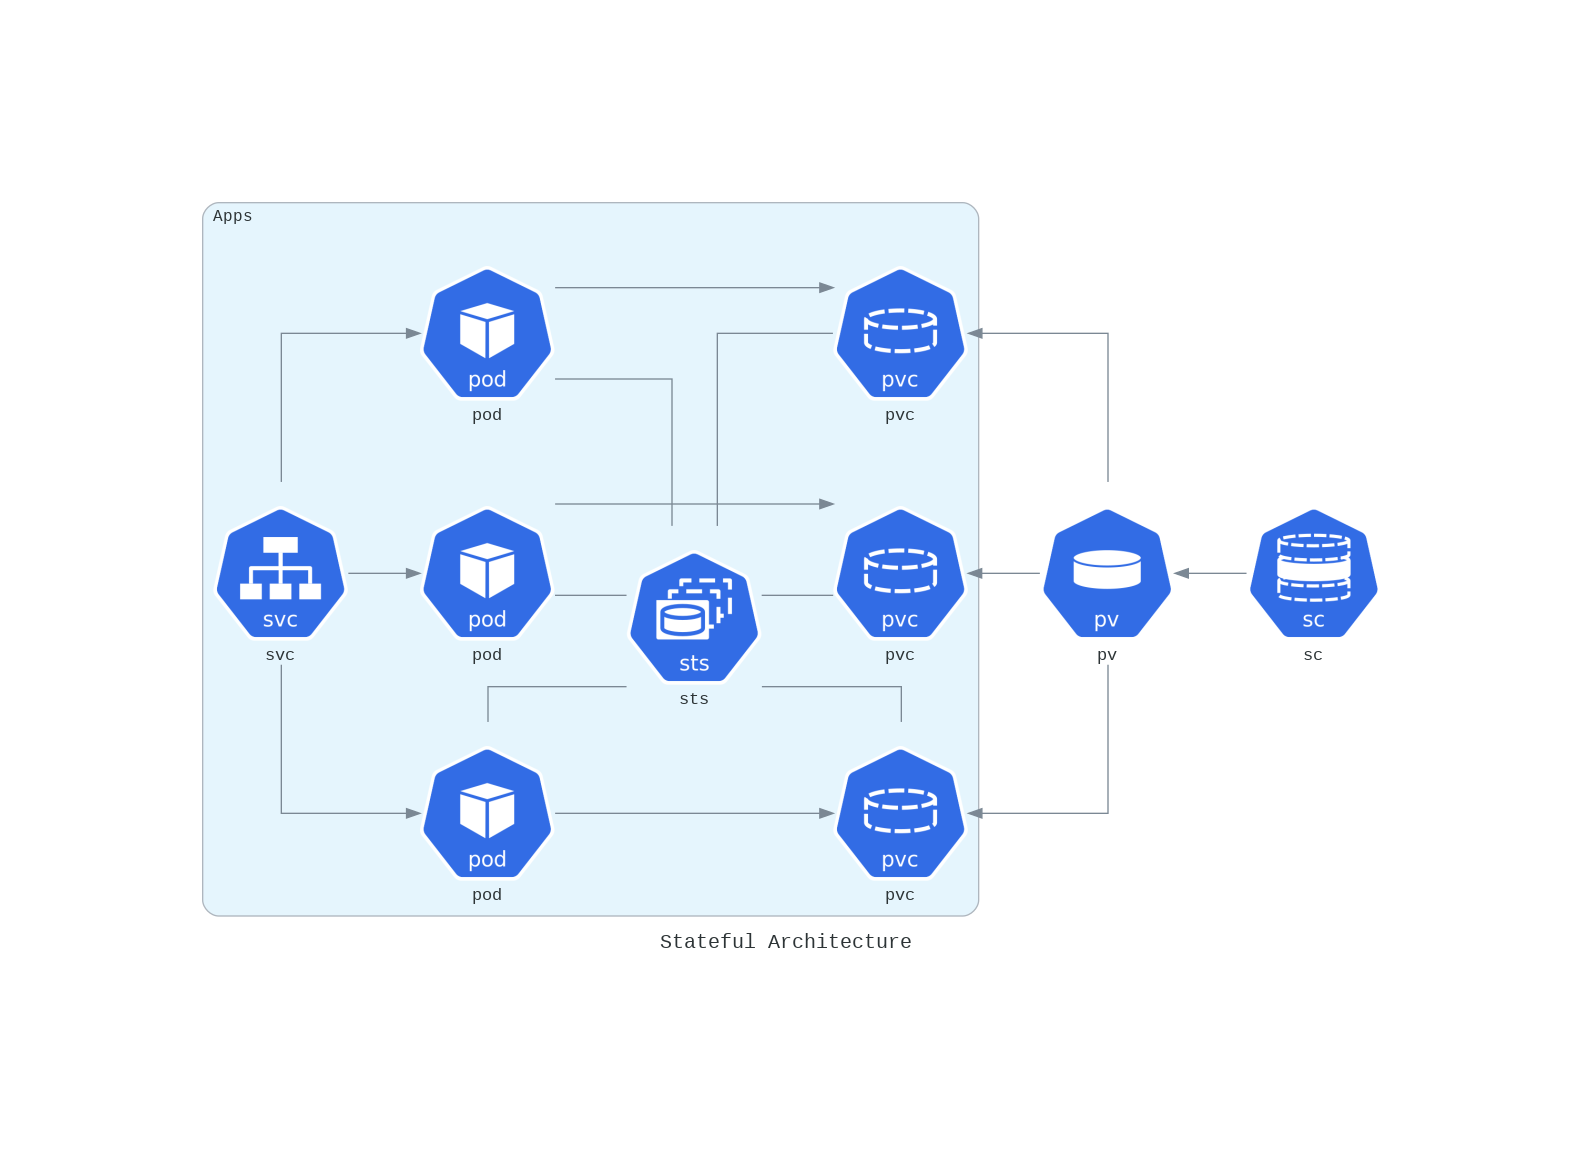

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass

with Diagram("Stateful Architecture", show=False) as dg:
    with Cluster("Apps"):
        svc = Service("svc")
        sts = StatefulSet("sts")

        apps = []
        for _ in range(3):
            pod = Pod("pod")
            pvc = PVC("pvc")
            pod - sts - pvc
            apps.append(svc >> pod >> pvc)

    apps << PV("pv") << StorageClass("sc")
dg

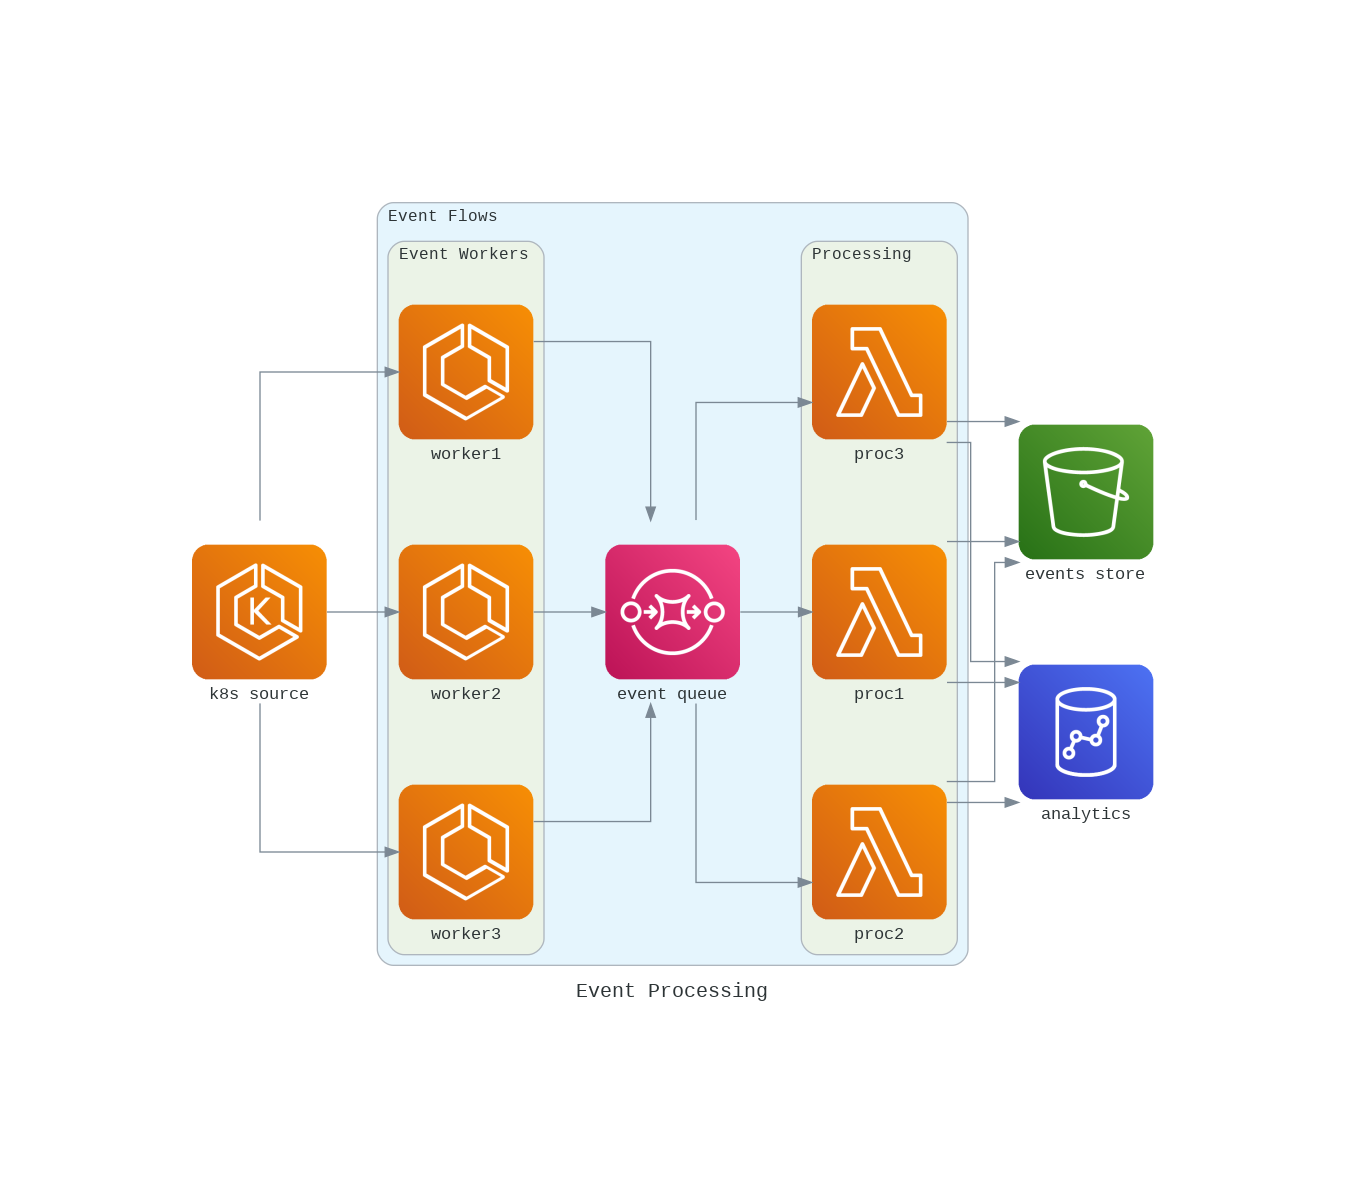

In [ ]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as dg:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw
dg